<a href="https://colab.research.google.com/github/rich-hyun/machine_learning_military/blob/main/%EC%9D%BC%EC%B0%A8%EB%B3%84/day6_2_guess_age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving project_proof2.xlsx to project_proof2 (9).xlsx
0.4897959183673469
0.47058823529411764
0.32653061224489793
0.23529411764705882


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


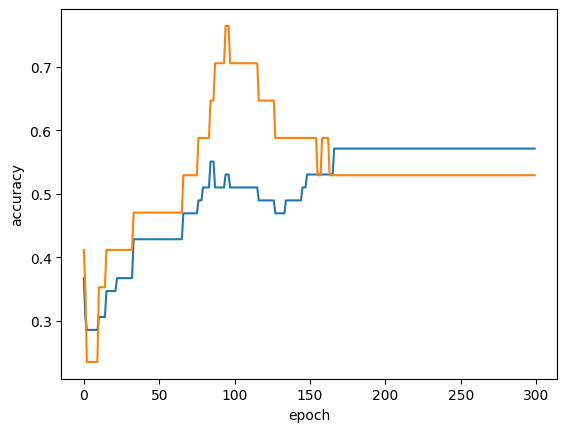

0.5714285714285714
0.5294117647058824
0.5714285714285714
0.5294117647058824


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [11]:
from google.colab import files
uploaded=files.upload()

import pandas as pd
workbook=pd.read_excel('project_proof2.xlsx')
base=workbook.to_numpy()

import matplotlib.pyplot as plt
import numpy as np

"""넘파이로 데이터 준비하기"""
age=[]
for k in range(66):
  age.append(base[k][1])
rdays=[]
for k in range(66):
  rdays.append(base[k][3])

age2=np.array(age)
rdays2=np.array(rdays)

base_data=[[l,w] for l,w in zip(age,rdays)]
base_target=[1]*52+[0]*14

from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(
    age2,rdays,stratify=base_target,random_state=42)

train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

from sklearn.linear_model import SGDClassifier
sc=SGDClassifier(loss='log',max_iter=10,random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

sc.partial_fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

import numpy as np
sc=SGDClassifier(loss='log', random_state=42)
train_score=[]
test_score=[]
classes=np.unique(train_target)

for _ in range(0,300):
  sc.partial_fit(train_scaled,train_target,classes=classes)
  train_score.append(sc.score(train_scaled,train_target))
  test_score.append(sc.score(test_scaled,test_target))

import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

sc=SGDClassifier(loss='log',max_iter=160,tol=None,random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

sc=SGDClassifier(loss='hinge',max_iter=160,tol=None,random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))